In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('diabetes.csv')

In [35]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


df_copy = df


features_to_impute = ['Insulin', 'SkinThickness']
df_copy[features_to_impute] = df_copy[features_to_impute].replace(0, np.nan)


for feature in features_to_impute:
    df_temp = df_copy.copy()


    not_null = df_temp[df_temp[feature].notnull()]
    is_null = df_temp[df_temp[feature].isnull()]


    X_train_rf = not_null.drop(columns=[feature, 'Outcome'])
    y_train_rf = not_null[feature]
    X_pred_rf = is_null.drop(columns=[feature, 'Outcome'])


    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_rf, y_train_rf)


    predicted_values = rf.predict(X_pred_rf)
    df_copy.loc[df_copy[feature].isnull(), feature] = predicted_values

In [38]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00,170.83,33.6,0.627,50,1
1,1,85,66,29.00,48.03,26.6,0.351,31,0
2,8,183,64,18.04,258.21,23.3,0.672,32,1
3,1,89,66,23.00,94.00,28.1,0.167,21,0
4,0,137,40,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.00,180.00,32.9,0.171,63,0
764,2,122,70,27.00,185.67,36.8,0.340,27,0
765,5,121,72,23.00,112.00,26.2,0.245,30,0
766,1,126,60,25.45,138.31,30.1,0.349,47,1


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [40]:
# df = pd.read_csv('your_data.csv')
# Assuming df_copy is your DataFrame
df = df_copy

# Split into X and y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = models.Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


/Users/dejak/data-visualization/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)


In [43]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5161 - loss: 0.9891 - precision_3: 0.2949 - recall_3: 0.4082 - val_accuracy: 0.6098 - val_loss: 0.6683 - val_precision_3: 0.4677 - val_recall_3: 0.6591
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5960 - loss: 0.7894 - precision_3: 0.4330 - recall_3: 0.5610 - val_accuracy: 0.7317 - val_loss: 0.6129 - val_precision_3: 0.6486 - val_recall_3: 0.5455
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5881 - loss: 0.7592 - precision_3: 0.4323 - recall_3: 0.4934 - val_accuracy: 0.7317 - val_loss: 0.5817 - val_precision_3: 0.7200 - val_recall_3: 0.4091
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - loss: 0.6803 - precision_3: 0.4605 - recall_3: 0.5289 - val_accuracy: 0.7317 - val_loss: 0.5603 - val_precision_3: 0.7619 - val_recall_3: 0.3636
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 0.6553 - precision_3: 0.4865 - recall_3: 0.4926 - val_accuracy: 0.7398

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7324 - loss: 0.5411 - precision_3: 0.6692 - recall_3: 0.5068
Test Loss: 0.5184
Test Accuracy: 0.7403
Test Precision: 0.6750
Test Recall: 0.5000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


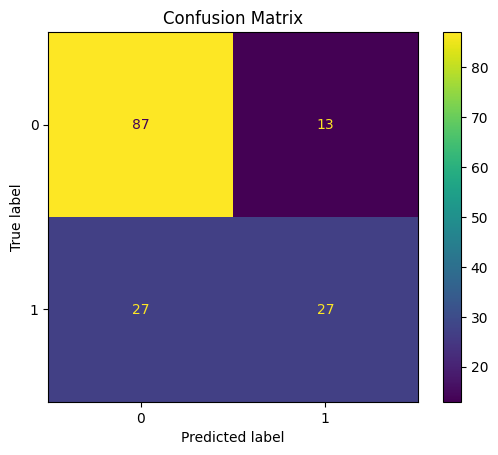

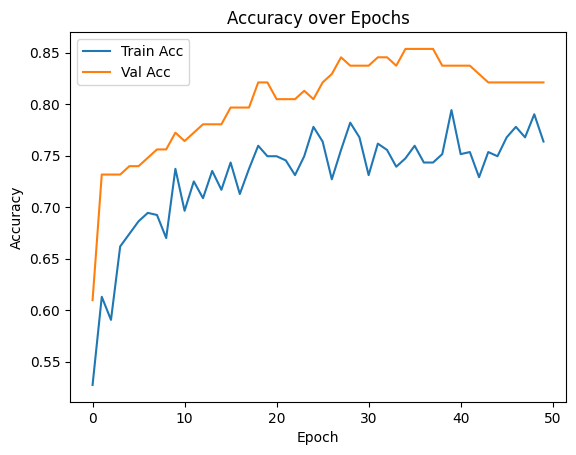

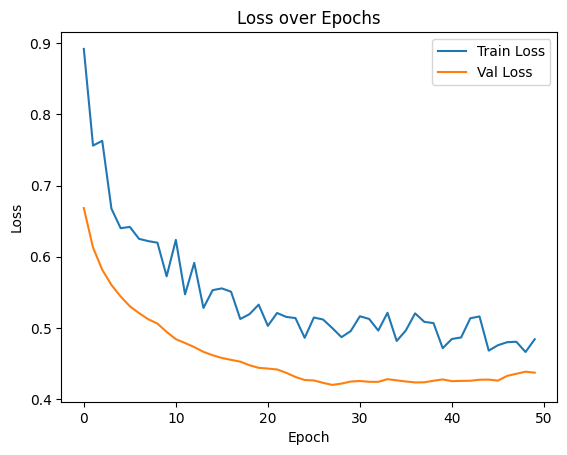

In [44]:
results = model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")

# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Learning Curves
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# 2. قراءة البيانات
df = pd.read_csv('diabetes.csv')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


df_copy = df


features_to_impute = ['Insulin', 'SkinThickness']
df_copy[features_to_impute] = df_copy[features_to_impute].replace(0, np.nan)


for feature in features_to_impute:
    df_temp = df_copy.copy()


    not_null = df_temp[df_temp[feature].notnull()]
    is_null = df_temp[df_temp[feature].isnull()]


    X_train_rf = not_null.drop(columns=[feature, 'Outcome'])
    y_train_rf = not_null[feature]
    X_pred_rf = is_null.drop(columns=[feature, 'Outcome'])


    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_rf, y_train_rf)


    predicted_values = rf.predict(X_pred_rf)
    df_copy.loc[df_copy[feature].isnull(), feature] = predicted_values


for col in ['Glucose', 'BloodPressure', 'BMI']:
    df_copy[col] = df_copy[col].replace(0, df_copy[col].median())


X = df_copy.drop("Outcome", axis=1)
y = df_copy["Outcome"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (614, 8)
Test set shape: (154, 8)


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00,170.83,33.6,0.627,50,1
1,1,85,66,29.00,48.03,26.6,0.351,31,0
2,8,183,64,18.04,258.21,23.3,0.672,32,1
3,1,89,66,23.00,94.00,28.1,0.167,21,0
4,0,137,40,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.00,180.00,32.9,0.171,63,0
764,2,122,70,27.00,185.67,36.8,0.340,27,0
765,5,121,72,23.00,112.00,26.2,0.245,30,0
766,1,126,60,25.45,138.31,30.1,0.349,47,1


In [4]:
df = df_copy
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00,170.83,33.6,0.627,50,1
1,1,85,66,29.00,48.03,26.6,0.351,31,0
2,8,183,64,18.04,258.21,23.3,0.672,32,1
3,1,89,66,23.00,94.00,28.1,0.167,21,0
4,0,137,40,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.00,180.00,32.9,0.171,63,0
764,2,122,70,27.00,185.67,36.8,0.340,27,0
765,5,121,72,23.00,112.00,26.2,0.245,30,0
766,1,126,60,25.45,138.31,30.1,0.349,47,1


In [5]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00,170.83,33.6,0.627,50,1
1,1,85,66,29.00,48.03,26.6,0.351,31,0
2,8,183,64,18.04,258.21,23.3,0.672,32,1
3,1,89,66,23.00,94.00,28.1,0.167,21,0
4,0,137,40,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.00,180.00,32.9,0.171,63,0
764,2,122,70,27.00,185.67,36.8,0.340,27,0
765,5,121,72,23.00,112.00,26.2,0.245,30,0
766,1,126,60,25.45,138.31,30.1,0.349,47,1


In [6]:
# 4. تجهيز البيانات
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 5. موازنة البيانات (SMOTE)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [7]:
# 6. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

# 7. مقياس البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# 8. بناء النموذج
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/Users/dejak/data-visualization/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [10]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 9. التدريب
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4983 - loss: 1.0039 - precision: 0.5074 - recall: 0.5219 - val_accuracy: 0.5562 - val_loss: 0.6709 - val_precision: 0.5536 - val_recall: 0.7470
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5883 - loss: 0.7977 - precision: 0.5855 - recall: 0.6067 - val_accuracy: 0.6375 - val_loss: 0.6493 - val_precision: 0.6068 - val_recall: 0.8554
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 0.8385 - precision: 0.5797 - recall: 0.5698 - val_accuracy: 0.6500 - val_loss: 0.6294 - val_precision: 0.6154 - val_recall: 0.8675
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5614 - loss: 0.8361 - precision: 0.5632 - recall: 0.5690 - val_accuracy: 0.6562 - val_loss: 0.6105 - val_precision: 0.6228 - val_recall: 0.8554
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.6673 - precision: 0.6444 - recall: 0.6601 - val_accuracy: 0.6750 - val_loss: 0.5960 

In [11]:
# 10. التقييم الرقمي
results = model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7633 - loss: 0.5083 - precision: 0.7246 - recall: 0.8547  
Test Loss: 0.4883
Test Accuracy: 0.7850
Test Precision: 0.7478
Test Recall: 0.8600


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


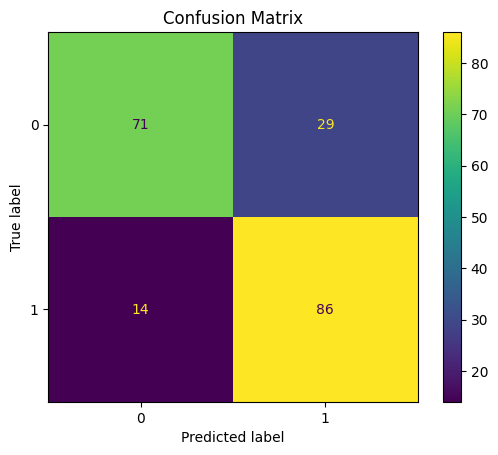

In [ ]:
# 11. مصفوفة الالتباس
y_pred = (model.predict(X_test) > 0.3).astype("int32")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


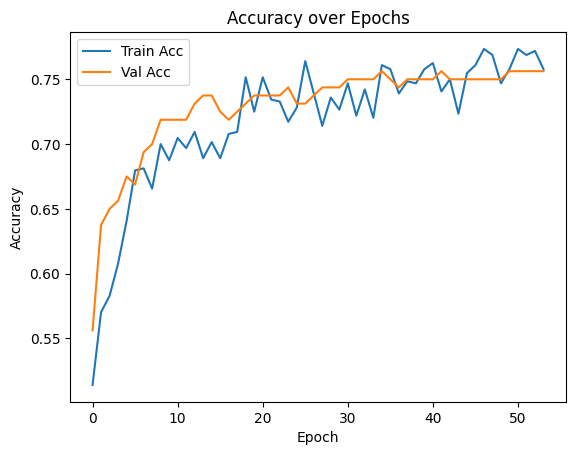

In [13]:
# 12. رسم منحنيات الدقة (Accuracy) والـ Loss
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

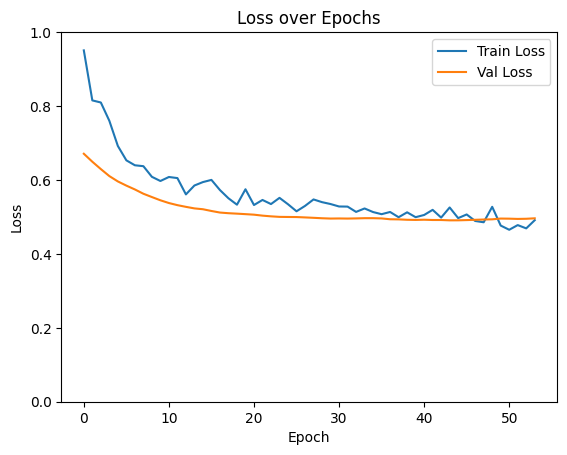

In [14]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend()
plt.title('Loss over Epochs')
plt.show()